# Описание проекта
Есть компания, которая разрабатывает игры.Основной хит — бесплатный командный онлайн-шутер. В игре есть внутриигровая валюта, которую можно выигрывать,побеждая в матчах, а можно покупать за настоящие деньги.
На днях в игре прошёл A/B-тест — некоторые игроки могли приобрести премиунуню броню по скидке.руководство хочет узнать, как это повлияло на ARPU (средя 
прибыль на игрока), ARPPU (средняя прибыль на плащетягогигрока) икна траты внутриигровой валюты
# Цель исследования

Выяснить, стоит ли проводить акцию в дальнейшем. Если игроки, участвовавшие в
акции, принесли больше денег, чем игроки, у которых акции не было, то стоит
повторять акцию и при этомвсех игроках кав:проведение исследовательского анализа данных<br>
проведение АВ-теста<br>

По результатам исследования необходимо подготовить:<br>
текстовый документ с подробным описанием проекта, расчётами и выводами<br>
графики сравнения метрик по дням (Power BI)<br>

Входные данные<br>
Датасеты содержат данные об игроках:<br>
Money — таблица с платежами.<br>
● Cheaters — таблица с обнаруженными читерами.<br>
● Platforms — таблица с игровыми платформами (PC, PS4, Xbox).<br>
● Cash — таблица с тратами внутриигровой валюты.<br>
● ABgroup — таблица с распределением игроков по группам тенет.


In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats as st
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import math as mth
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
from sklearn import metrics 
from plotly import graph_objects as go
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from scipy.stats import kurtosis
from scipy.stats import skew

## ШАГ 1. Загрузка данных и изучение общей информации

In [2]:
ABgroup = pd.read_csv('ABgroup.csv', sep=',')
cash = pd.read_csv('Cash.csv', sep=',')
money = pd.read_csv('Money.csv', sep=',')
cheaters = pd.read_csv('Cheaters.csv', sep=',')
platforms = pd.read_csv('Platforms.csv', sep=',')

In [3]:
ABgroup.head()

,user_id,group
0,VX6NLA-F5YMSW,control
1,2AXN3D-71ZN86,test
2,K78V3J-TQMV6F,test
3,Z2KEIG-LY3V4H,test
4,ND92RZ-SHG980,control


In [4]:
cash.head()

,user_id,date,cash
0,GGLSXL-U5BGGY,17.07.2021,200
1,DPWFFN-NL3VF8,16.07.2021,150
2,PASNNG-GVW4RR,11.07.2021,1100
3,4F0AW7-F40GY9,15.07.2021,1050
4,CEY6AF-YTSM4V,15.07.2021,150


In [5]:
money.head()

,user_id,date,money
0,N4TS2T-P7YTVX,15.07.2021,1.99
1,NX9S0D-VM20W8,16.07.2021,0.99
2,QYY6FW-FKHRND,15.07.2021,0.00
3,BRWH4Y-LPGBU6,14.07.2021,0.00
4,8O317F-4ASK53,13.07.2021,0.00


In [6]:
cheaters.head()

,user_id,cheaters
0,TWLWB9-L19SYJ,0
1,SD0L4U-1JG4WN,0
2,QZVG35-P8JKNU,0
3,S2VBV4-ZKBHI6,0
4,DDGKMQ-45SP8R,0


In [7]:
platforms.head()

,user_id,platform
0,NHFL0F-Y90OSH,XBox
1,MVPNHS-PBHB8S,XBox
2,1UWMRN-8NVCLI,PC
3,EHO5II-03X9PU,PS4
4,7C5ZAE-D1NCY9,XBox


In [8]:
frames = [ABgroup,cash,money,cheaters,platforms]

In [9]:
for i in frames:
    print(i.describe())

              user_id    group
count         8640000  8640000
unique        1080000        2
top     VX6NLA-F5YMSW  control
freq                8  4322776
               cash
count  8.640000e+06
mean   7.634015e+02
std    8.836145e+02
min    0.000000e+00
25%    2.500000e+02
50%    7.000000e+02
75%    1.150000e+03
max    1.482000e+05
              money
count  8.640000e+06
mean   7.489878e-01
std    7.922920e-01
min    0.000000e+00
25%    0.000000e+00
50%    9.900000e-01
75%    9.900000e-01
max    9.990000e+00
           cheaters
count  8.640000e+06
mean   3.268519e-04
std    1.807609e-02
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.000000e+00
              user_id platform
count         8640000  8640000
unique        1080000        3
top     NHFL0F-Y90OSH     XBox
freq                8  2884256


In [10]:
for i in frames:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   group    object
dtypes: object(2)
memory usage: 131.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   date     object
 2   cash     int64 
dtypes: int64(1), object(2)
memory usage: 197.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   date     object 
 2   money    float64
dtypes: float64(1), object(2)
memory usage: 197.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640000 entries, 0 to 8639999
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   object
 1   cheaters  int64 
dt

In [11]:
for i in frames:
    print(len(i))

8640000
8640000
8640000
8640000
8640000


In [12]:
ABgroup['group'].value_counts()

group
control    4322776
test       4317224
Name: count, dtype: int64

In [13]:
platforms['platform'].value_counts()

platform
XBox    2884256
PC      2881992
PS4     2873752
Name: count, dtype: int64

In [14]:
cheaters['cheaters'].value_counts()

cheaters
0    8637176
1       2824
Name: count, dtype: int64

In [15]:
print('Читеры составляют долю в числе всех игроков:', round((len(cheaters.query('cheaters == 1'))/len(cheaters)*100),3),'%')

Читеры составляют долю в числе всех игроков: 0.033 %


Число игроков в контрольной и тестовой выборках почти совпадает, но в контрольной игроков чуть больше. По платформам игроки распределены равномерно, число читеров мало (всего 0,033 %)

## ШАГ 2. Предобработка данных
### работа с дубликатами

In [16]:
ABgroup.duplicated().sum()

7560000

In [17]:
cash.duplicated().sum()

0

In [18]:
money.duplicated().sum()

0

In [19]:
cheaters.duplicated().sum()

7560000

In [20]:
platforms.duplicated().sum()

7560000

In [21]:
ABgroup.drop_duplicates(inplace=True)
cheaters.drop_duplicates(inplace=True)
platforms.drop_duplicates(inplace=True)

### работа с пропусками

In [22]:
for i in frames:
    print(i.isna().sum())

user_id    0
group      0
dtype: int64
user_id    0
date       0
cash       0
dtype: int64
user_id    0
date       0
money      0
dtype: int64
user_id     0
cheaters    0
dtype: int64
user_id     0
platform    0
dtype: int64


### проверка типов данных на соответствие

In [23]:
cash['date'] =  pd.to_datetime(cash['date']).dt.date
money['date'] = pd.to_datetime(money['date']).dt.date

Число записей в датасетах совпадает. Объединим данные в один датасет, чтобы упростить анализ

In [24]:
data = ABgroup.merge(cash, on='user_id').merge(money, on = ['user_id', 'date']).merge(cheaters, on='user_id').merge(platforms, on='user_id')

In [25]:
data

,user_id,group,date,cash,money,cheaters,platform
0,VX6NLA-F5YMSW,control,2021-07-15,100,0.00,0,XBox
1,VX6NLA-F5YMSW,control,2021-07-14,400,0.00,0,XBox
2,VX6NLA-F5YMSW,control,2021-07-13,650,0.99,0,XBox
3,VX6NLA-F5YMSW,control,2021-07-11,1450,1.99,0,XBox
4,VX6NLA-F5YMSW,control,2021-07-12,900,0.00,0,XBox
...,...,...,...,...,...,...,...
8639995,92UJ17-E1MPN5,control,2021-07-14,600,0.99,0,PC
8639996,92UJ17-E1MPN5,control,2021-07-17,850,0.99,0,PC
8639997,92UJ17-E1MPN5,control,2021-07-10,850,0.00,0,PC
8639998,92UJ17-E1MPN5,control,2021-07-11,450,0.99,0,PC


Исследуем выбросы

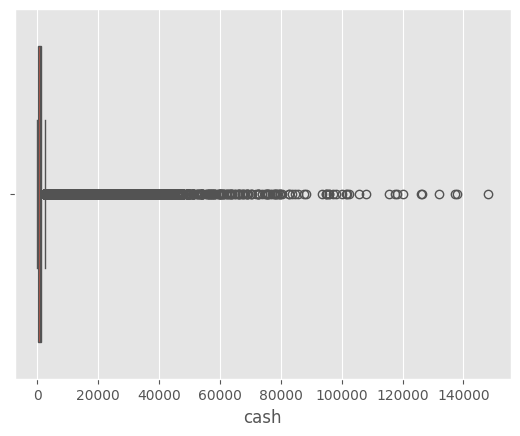

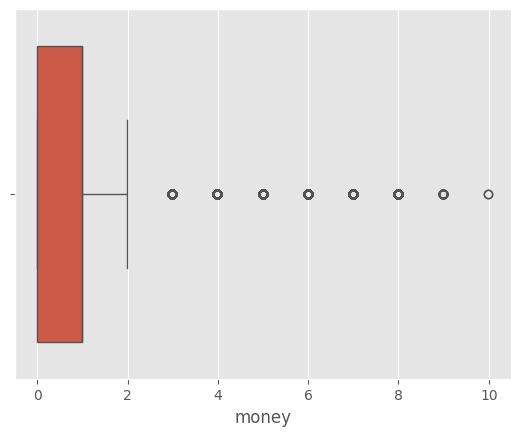

In [26]:
cols = ['cash','money']
for i in cols:
    plt.figure()
    sns.boxplot(x=i, data=data)
    plt.show()

Много выбросов в трате внутриигровой валюты. Игроки тратят разные сумму на донаты. От небольших трат до больших сумм свыше 100000. Также есть выбросы в платежах, но они не такие сильные и распределены равномерно

Проверим, есть ли пересечение в группах

In [27]:
data[data['group'] == 'control'].merge(data[data['group'] == 'test'],how='inner')

,user_id,group,date,cash,money,cheaters,platform


Пересечения нет

In [28]:
max(data['date']) - min(data['date'])

datetime.timedelta(days=7)

In [29]:
print('Минимальная дата:',  data['date'].min())
print('Максимальная дата:',  data['date'].max())

Минимальная дата: 2021-07-10
Максимальная дата: 2021-07-17


ВЫВОДЫ: Тест длится 8 дней с 2021-07-10 по 2021-07-17. Пересечения в группах нет, пропусков нет, дубликаты удалены. Можно переходить к анализу данных и АВ-тесту

## ШАГ 2. исследовательский анализ данных

## Исследуем читеров

In [30]:
cheaters_true = data[data['cheaters'] == 1]

In [31]:
cheaters_true

,user_id,group,date,cash,money,cheaters,platform
17264,U192N6-HV5KWD,test,2021-07-13,0,0.0,1,PC
17265,U192N6-HV5KWD,test,2021-07-14,15750,0.0,1,PC
17266,U192N6-HV5KWD,test,2021-07-16,30800,0.0,1,PC
17267,U192N6-HV5KWD,test,2021-07-15,19500,0.0,1,PC
17268,U192N6-HV5KWD,test,2021-07-11,16800,0.0,1,PC
...,...,...,...,...,...,...,...
8626547,BYJYC4-DGYC2E,test,2021-07-12,19550,0.0,1,PC
8626548,BYJYC4-DGYC2E,test,2021-07-13,28350,0.0,1,PC
8626549,BYJYC4-DGYC2E,test,2021-07-15,29700,0.0,1,PC
8626550,BYJYC4-DGYC2E,test,2021-07-17,37200,0.0,1,PC


In [32]:
cheaters_true.describe()

,cash,money,cheaters
count,2824.000000,2824.0,2824.0
mean,18350.991501,0.0,1.0
std,16069.479162,0.0,0.0
min,0.000000,0.0,1.0
25%,5200.000000,0.0,1.0
50%,16200.000000,0.0,1.0
75%,28600.000000,0.0,1.0
max,148200.000000,0.0,1.0


In [33]:
cheaters_true.pivot_table(index='date', columns='group', values=['cash','money'], aggfunc=['sum'])

sum                      
               cash            money     
group       control     test control test
date                                     
2021-07-10  3139000  3805450     0.0  0.0
2021-07-11  3294350  3672100     0.0  0.0
2021-07-12  3429550  3755500     0.0  0.0
2021-07-13  2989950  3516150     0.0  0.0
2021-07-14  2644600  3772600     0.0  0.0
2021-07-15  2257000  2989250     0.0  0.0
2021-07-16  2222100  2411400     0.0  0.0
2021-07-17  3910900  4013300     0.0  0.0

Читеры вообще не делают платежи (не донатят), в тестовой выборке тратят валюту чаще

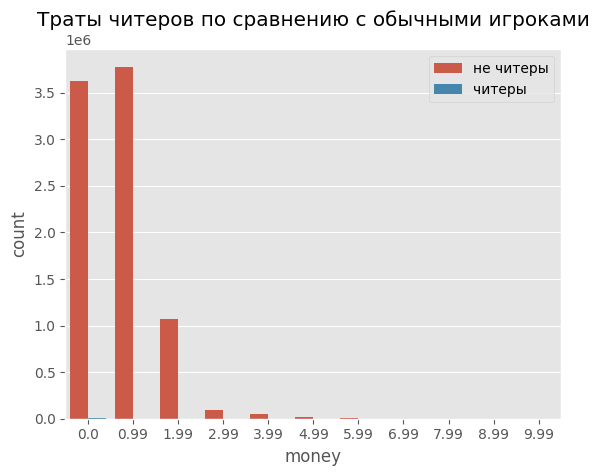

In [34]:
ax = sns.countplot(data=data, x='money', hue='cheaters');
plt.title('Траты читеров по сравнению с обычными игроками')
plt.legend(['не читеры', 'читеры'])
plt.show()

траты обычных игроков и читеров различаются в десятки раз

In [35]:
players = data[data['cheaters'] == 0]

In [36]:
players.describe()

,cash,money,cheaters
count,8.637176e+06,8.637176e+06,8637176.0
mean,7.576511e+02,7.492327e-01,0.0
std,7.716610e+02,7.923057e-01,0.0
min,0.000000e+00,0.000000e+00,0.0
25%,2.500000e+02,0.000000e+00,0.0
50%,7.000000e+02,9.900000e-01,0.0
75%,1.150000e+03,9.900000e-01,0.0
max,1.377500e+05,9.990000e+00,0.0


In [37]:
pd.options.display.float_format = '{:,.1f}'.format

In [38]:
players.pivot_table(index='date', columns='group', values=['cash','money'], aggfunc=['sum'])

sum                               
                 cash                money          
group         control       test   control      test
date                                                
2021-07-10  417591900  443296700 393,870.2 410,341.9
2021-07-11  417242650  443683050 392,476.6 410,937.9
2021-07-12  414719750  441187750 390,787.8 409,077.7
2021-07-13  404319650  431313900 382,743.8 400,947.8
2021-07-14  379563100  406018100 364,514.4 383,022.8
2021-07-15  334164900  359357950 335,543.7 353,538.5
2021-07-16  271665950  292954750 299,028.2 314,611.7
2021-07-17  518740900  568145000 588,901.1 640,910.7

In [40]:
players['date'] = pd.to_datetime(players['date'])

In [41]:
players['week'] = players['date'].dt.isocalendar().week

In [42]:
players

,user_id,group,date,cash,money,cheaters,platform,week
0,VX6NLA-F5YMSW,control,2021-07-15,100,0.0,0,XBox,28
1,VX6NLA-F5YMSW,control,2021-07-14,400,0.0,0,XBox,28
2,VX6NLA-F5YMSW,control,2021-07-13,650,1.0,0,XBox,28
3,VX6NLA-F5YMSW,control,2021-07-11,1450,2.0,0,XBox,27
4,VX6NLA-F5YMSW,control,2021-07-12,900,0.0,0,XBox,28
...,...,...,...,...,...,...,...,...
8639995,92UJ17-E1MPN5,control,2021-07-14,600,1.0,0,PC,28
8639996,92UJ17-E1MPN5,control,2021-07-17,850,1.0,0,PC,28
8639997,92UJ17-E1MPN5,control,2021-07-10,850,0.0,0,PC,27
8639998,92UJ17-E1MPN5,control,2021-07-11,450,1.0,0,PC,27


In [49]:
table = players.pivot_table(index='group', columns='week', values=['money'], aggfunc=['sum'])

In [51]:
table.to_excel('table_ex.xlsx')

In [45]:
table_week = players.pivot_table(index='week', values=['cash','money'], aggfunc=['sum'])

In [46]:
table_week

sum            
            cash       money
week                        
27    1721814300 1,607,626.7
28    4822151700 4,863,628.3

Чтобы найти ещё читеров, нужно найти тех, кто не покупает валюту, но имеет большие траты

In [ ]:
player_much = np.percentile(players[['user_id',	'group','cash','money']].groupby('user_id').agg('sum').cash, 95)

In [ ]:
player_group = players[['user_id','cash','money']].groupby('user_id').agg('sum')

In [ ]:
player_group

In [ ]:
cheat_play = player_group.query('cash > @player_much and money == 0')

In [ ]:
cheat_play = cheat_play.reset_index()

Найден список игроков с большими тратами и без покупки валюты, скорее всего они читеры. Присвоим им значение 1

In [ ]:
data.loc[data['user_id'].isin(cheat_play['user_id']), 'cheaters'] = 1

In [ ]:
players = data[data['cheaters'] == 0]

## ШАГ 3 Расчёт метрик и проведение теста

Рассмотрим графики трат читеров и обычных игроков среди контрольной и тестовой выборок

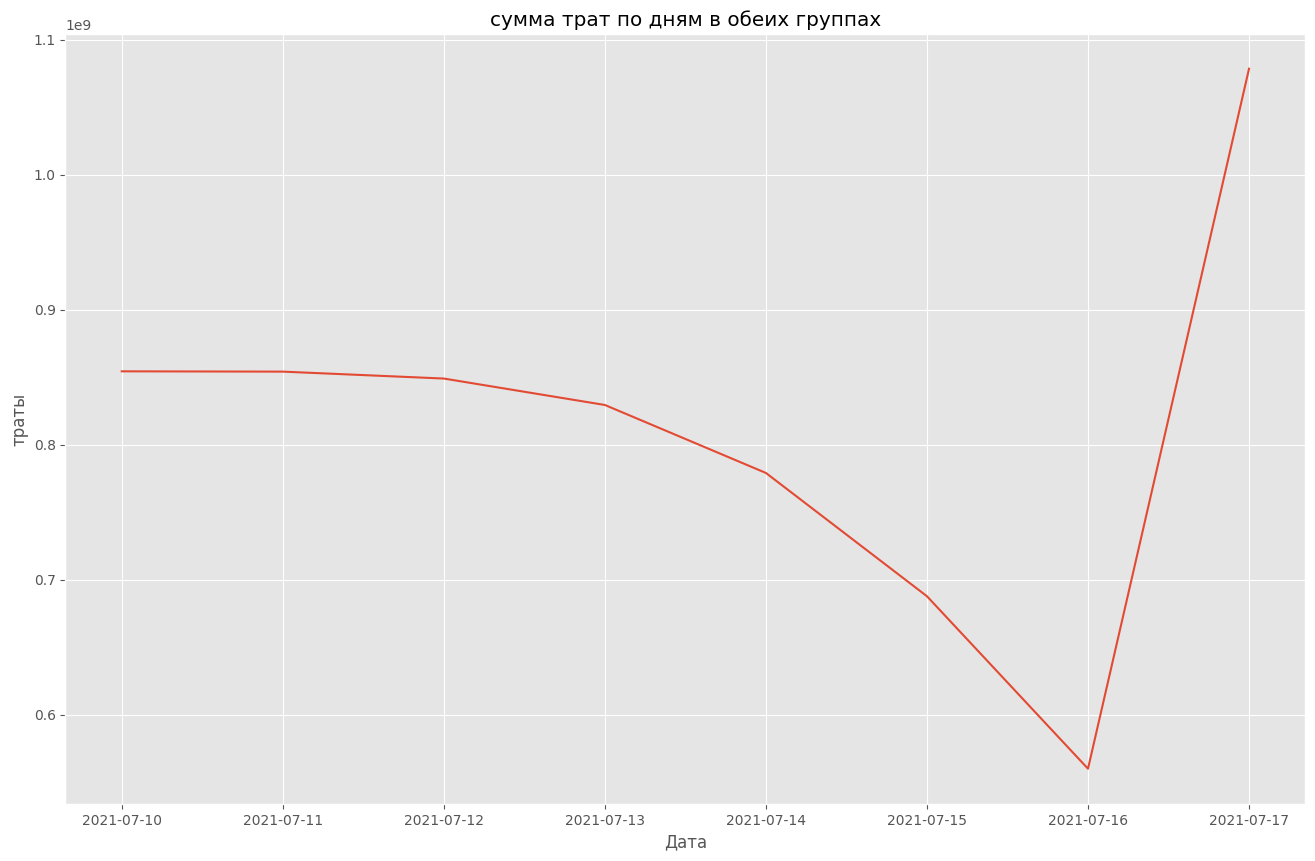

In [167]:
test_group = players.pivot_table(
    index=['date', 'group'], values='cash', aggfunc='sum').reset_index()
test_group.groupby('date')['cash'].sum().plot(figsize=(16, 10))
plt.title('сумма трат по дням в обеих группах')
plt.xlabel('Дата')
plt.ylabel('траты')
plt.show()

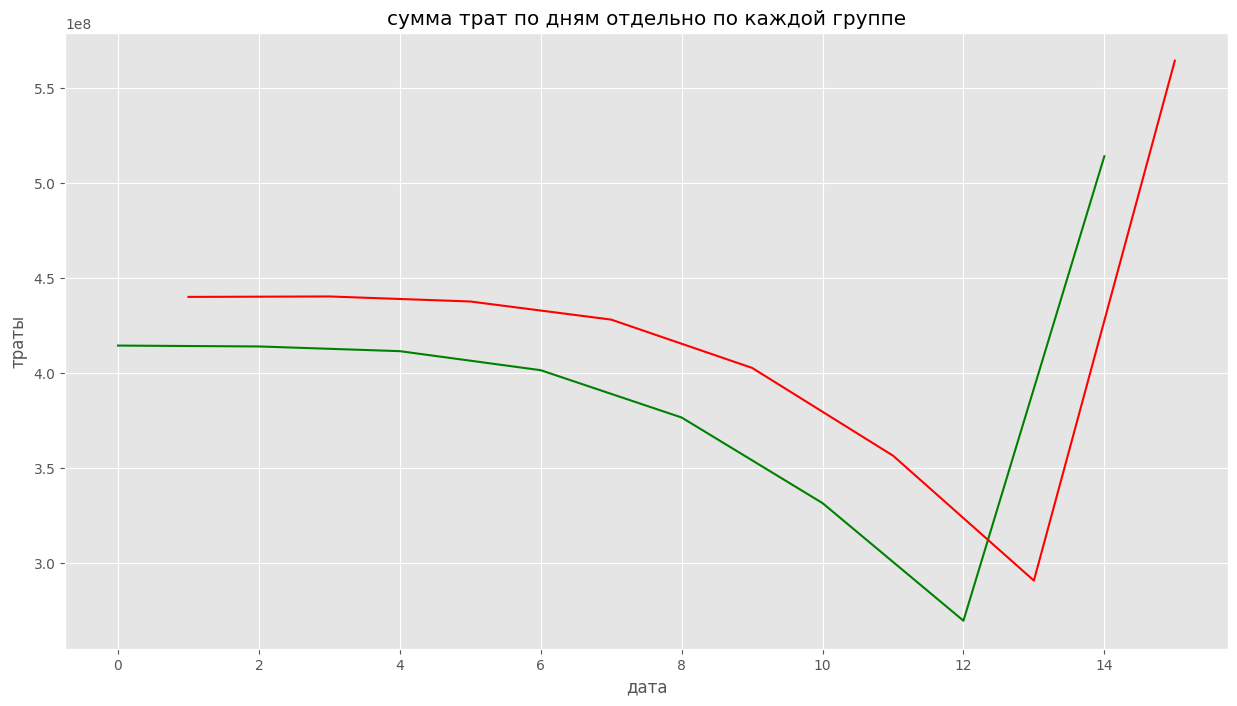

In [168]:
plt.figure(figsize=(15, 8))
test_group[test_group['group'] == 'control']['cash'].plot(color='g', label='control')
test_group[test_group['group'] == 'test']['cash'].plot(color='r', label='test')
plt.title('сумма трат по дням отдельно по каждой группе')
plt.xlabel('дата')
plt.ylabel('траты')
plt.show()

В обеих группах траты постепенно падают к 7 дню и резко растут на 8 день

In [169]:
test_group = players[players['group'] == 'test']
control_group = players[players['group'] == 'control']

In [170]:
del cheaters
del cheaters_true
del ABgroup
del cash
del money
del platforms

In [171]:
test_group.sort_values(by=['user_id'])

,user_id,group,date,cash,money,cheaters,platform
8535537,0004MK-VW0O9L,test,2021-07-11,50,0.0,0,PC
8535536,0004MK-VW0O9L,test,2021-07-12,550,0.0,0,PC
8535538,0004MK-VW0O9L,test,2021-07-17,550,1.0,0,PC
8535539,0004MK-VW0O9L,test,2021-07-14,1250,2.0,0,PC
8535540,0004MK-VW0O9L,test,2021-07-10,0,0.0,0,PC
...,...,...,...,...,...,...,...
1449586,ZZZTR5-QSI6D3,test,2021-07-16,500,0.0,0,XBox
1449585,ZZZTR5-QSI6D3,test,2021-07-17,900,0.0,0,XBox
1449584,ZZZTR5-QSI6D3,test,2021-07-13,800,0.0,0,XBox
1449591,ZZZTR5-QSI6D3,test,2021-07-10,1000,1.0,0,XBox


### Построим графики распределения и сделаем выводы

In [172]:
test_group_rasp = test_group.pivot_table(
    index=['user_id'], values=['cash','money'], aggfunc='sum').reset_index()

In [173]:
test_group_rasp

,user_id,cash,money
0,0004MK-VW0O9L,6300,5.0
1,0005S4-UEC6BE,5000,6.0
2,0007I5-EWUD6O,6350,6.9
3,000IF8-UU506H,5350,6.9
4,000IX6-VZLBS1,9900,10.9
...,...,...,...
539307,ZZZIS2-9EYJF3,7100,4.0
539308,ZZZONB-1W7QEW,6750,7.0
539309,ZZZPEX-P2T8BH,6600,7.0
539310,ZZZTEN-0QGZ3X,4600,6.0


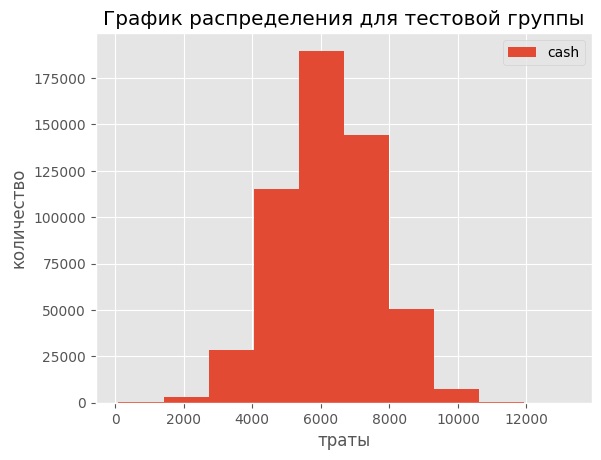

In [174]:
test_group_rasp.plot.hist(y='cash')
plt.title('График распределения для тестовой группы')
plt.xlabel('траты')
plt.ylabel('количество')
plt.show()

In [175]:
print("Эксцесс ", kurtosis(test_group_rasp['cash']))
print("Ассиметрия ", skew(test_group_rasp['cash']))

Эксцесс  0.006093711613086583
Ассиметрия  0.010217085257937361


распределение нормальное

In [176]:
cotrol_group_rasp = control_group.pivot_table(
    index=['user_id'], values='cash', aggfunc='sum').reset_index()

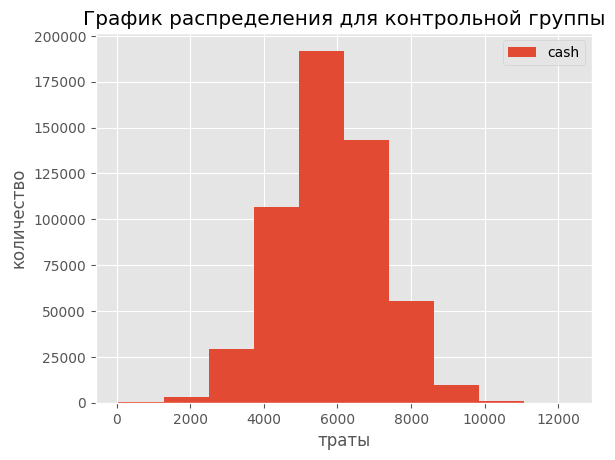

In [177]:
cotrol_group_rasp.plot.hist(y='cash')
plt.title('График распределения для контрольной группы')
plt.xlabel('траты')
plt.ylabel('количество')
plt.show()

In [178]:
print("Эксцесс ", kurtosis(cotrol_group_rasp['cash']))
print("Ассиметрия ", skew(cotrol_group_rasp['cash']))

Эксцесс  0.03639547405548127
Ассиметрия  0.044479811298419145


распределение нормальное

### Найдем ARPU и ARPPU, а также доверительные интервалы

In [179]:
ARPU_test = test_group['money'].sum()/len(test_group['user_id'].unique())
ARPU_control = control_group['money'].sum()/len(control_group['user_id'].unique())
print('ARPU тестовой группы:', ARPU_test, '\n', 'ARPU контрольной группы: ', ARPU_control)

ARPU тестовой группы: 6.162275602990477 
 ARPU контрольной группы:  5.829478250563438


### Теперь найдем ARPPU

In [180]:
ARPPU_test = test_group.query('money > 0')['money'].sum() / len(test_group.query('money > 0')['user_id'].unique())
ARPPU_control = control_group.query('money > 0')['money'].sum() / len(control_group.query('money > 0')['user_id'].unique())
print('ARPPU тестовой группы - ', ARPPU_test, '\n', 'ARPPU контрольной группы - ', ARPPU_control)

ARPPU тестовой группы -  6.163144115007183 
 ARPPU контрольной группы -  5.831108828541814


In [181]:
test_group

,user_id,group,date,cash,money,cheaters,platform
8,2AXN3D-71ZN86,test,2021-07-13,500,0.0,0,PC
9,2AXN3D-71ZN86,test,2021-07-10,550,0.0,0,PC
10,2AXN3D-71ZN86,test,2021-07-14,1700,1.0,0,PC
11,2AXN3D-71ZN86,test,2021-07-15,600,0.0,0,PC
12,2AXN3D-71ZN86,test,2021-07-17,0,0.0,0,PC
...,...,...,...,...,...,...,...
8639963,YO85DZ-Q7ZCCH,test,2021-07-14,1200,2.0,0,PS4
8639964,YO85DZ-Q7ZCCH,test,2021-07-11,1550,1.0,0,PS4
8639965,YO85DZ-Q7ZCCH,test,2021-07-16,150,0.0,0,PS4
8639966,YO85DZ-Q7ZCCH,test,2021-07-17,0,0.0,0,PS4


### также найдем их доверительные интервалы возьмем доверительную вероятность 95%

In [182]:
def confidence(df, column, alpha = 0.95):
    interval = st.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [183]:
test_group.drop('date', axis=1, inplace=True)
control_group.drop('date', axis=1, inplace=True)

In [184]:
test_confidence = confidence(test_group.groupby('user_id').agg('sum'), 'money')
print('Доверительный интервал тестовой группы среди всех игроков', test_confidence)
control_confidence = confidence(control_group.groupby('user_id').agg('sum'), 'money')
print('Доверительный интервал контрольной группы среди всех игроков', control_confidence)

Доверительный интервал тестовой группы среди всех игроков (2.4170771425285396, 9.907474063452419)
Доверительный интервал контрольной группы среди всех игроков (2.1572457079500182, 9.501710793176855)


In [185]:
test_paying_confidence = confidence(test_group.query('money > 0').groupby('user_id').agg('sum'), 'money')
print('Доверительный интервал тестовой группы среди платящих игроков', test_paying_confidence)
control_paying_confidence = confidence(control_group.query('money > 0').groupby('user_id').agg('sum'), 'money')
print('Доверительный интервал контрольной группы среди платящих игроков', control_paying_confidence)

Доверительный интервал тестовой группы среди платящих игроков (2.4204277288673626, 9.905860501146952)
Доверительный интервал контрольной группы среди платящих игроков (2.163338538240738, 9.498879118842845)


In [186]:
print('ARPPU тестовой группы больше контрольной на ', round((ARPPU_test - ARPPU_control) / ARPPU_control * 100, 3), '%')

ARPPU тестовой группы больше контрольной на  5.694 %


Проведём z-test, чтобы сравнить выборки, так как распределение нормальное

### Видим, что интервалы пересекаются по обоим метрикам, это может означать, что результаты случайны, результата от акции скорее всего нет

Теперь исследуем этот вопрос по каждой платформе

In [187]:
test_group_PC = test_group.query('platform == "PC"')
test_group_PS4 = test_group.query('platform == "PS4"')
test_group_Xbox = test_group.query('platform == "XBox"')
control_group_PC = control_group.query('platform == "PC"')
control_group_PS4 = control_group.query('platform == "PS4"')
control_group_Xbox = control_group.query('platform == "XBox"')

### создадим функции для платформ

In [188]:
def metrica(df):
    ARU = df['money'].sum()/len(df['user_id'].unique())
    print('ARPU', ARU)
    ARPPU = df.query('money > 0')['money'].sum() / len(df.query('money > 0')['user_id'].unique())
    print('ARPPU', ARPPU)
    
def intervals(df, column, alpha = 0.95):
    interval = st.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    print('Доверительный интервал', interval)
    
def grafics(df, alpha = 0.95):
    dpay = df.query('money > 0')
    dpay = dpay.groupby('user_id').agg('sum').reset_index()
    dpay.plot.hist(y='money')
    plt.title('График распределения для платящих игроков')
    plt.xlabel('money')
    plt.ylabel('количество')
    plt.show()
    print("Эксцесс ", kurtosis(dpay['money']))
    print("Ассиметрия ", skew(dpay['money']))
    dfs = df.groupby('user_id').agg('sum').reset_index()
    dfs.plot.hist(y='money',color='green')
    plt.title('График распределения для всех игроков')
    plt.xlabel('money')
    plt.ylabel('количество')
    plt.show()
    print("Эксцесс ", kurtosis(dfs['money']))
    print("Ассиметрия ", skew(dfs['money']))
 

### тестовая группа для игроков на ПК

In [189]:
metrica(test_group_PC)

ARPU 6.26904615726838
ARPPU 6.269743492769737


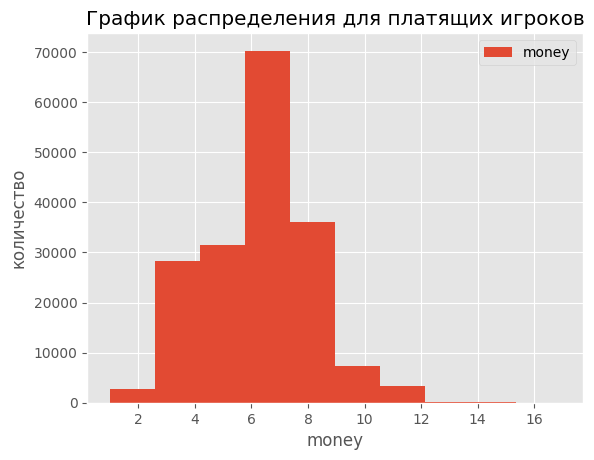

Эксцесс  0.04202343693785293
Ассиметрия  0.25253229675619193


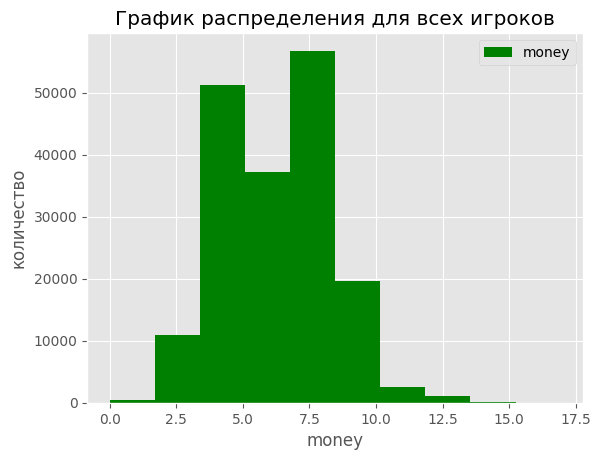

Эксцесс  0.04797887632809106
Ассиметрия  0.24937041981274452


In [190]:
grafics(test_group_PC)

In [191]:
intervals(test_group_PC, 'money', alpha = 0.95)

Доверительный интервал (-0.8020207189985556, 2.3692822583156508)


Есть ассиметрия, но распределение близко к нормальному

### Контрольная группа для игроков на ПК

In [192]:
metrica(control_group_PC)

ARPU 5.6462013442236225
ARPPU 5.64830690451673


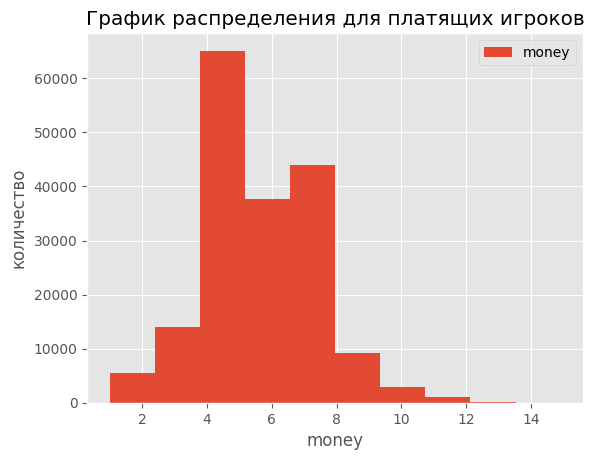

Эксцесс  -0.008085001731900299
Ассиметрия  0.2182449582961385


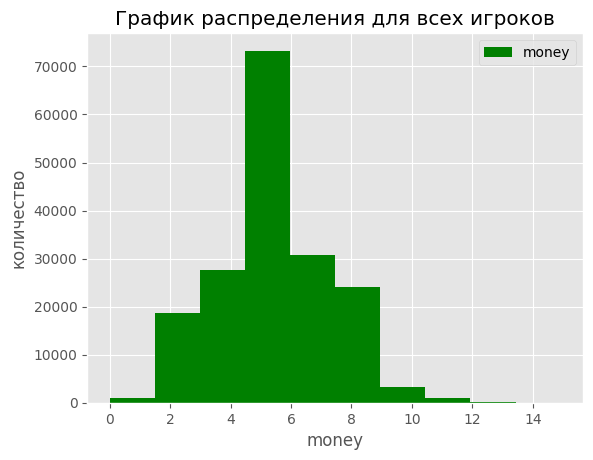

Эксцесс  0.00729470311058078
Ассиметрия  0.20938340950020856


In [193]:
grafics(control_group_PC)

In [194]:
intervals(control_group_PC, 'money', alpha = 0.95)

Доверительный интервал (-0.7718587664080462, 2.1834091024639517)


Интервалы пересекаются, результаты от акции получены случайно, но метрики ARPU и ARPPU больше для тестовой выборки. Значит акция немного подействовала на игроков на ПК

### тестовая группа для игроков на PS4

In [195]:
metrica(test_group_PS4)

ARPU 6.0848825906418105
ARPPU 6.085866288339104


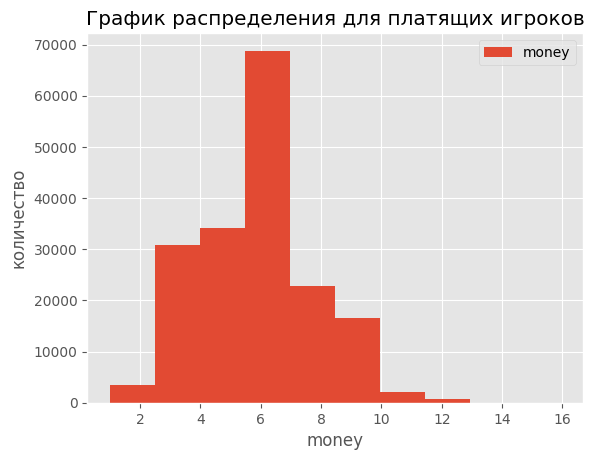

Эксцесс  -0.0025045069911668882
Ассиметрия  0.2226458689791371


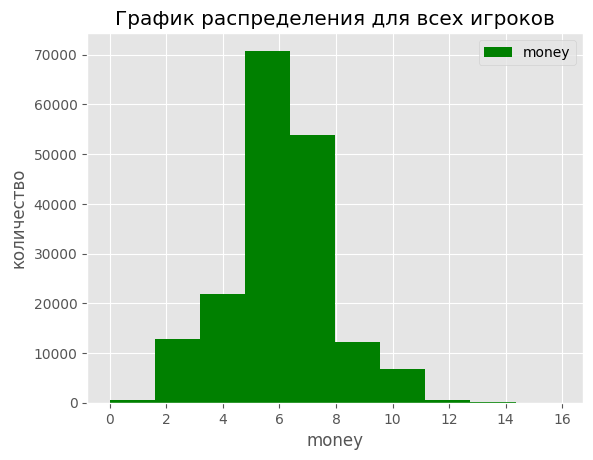

Эксцесс  0.005903475589768448
Ассиметрия  0.21822758720072227


In [196]:
grafics(test_group_PS4)

In [197]:
intervals(test_group_PS4, 'money', alpha = 0.95)

Доверительный интервал (-0.8055422834926164, 2.326762931153069)


### контрольная группа для игроков на PS4

In [198]:
metrica(control_group_PS4)

ARPU 5.737646937776687
ARPPU 5.739466416685665


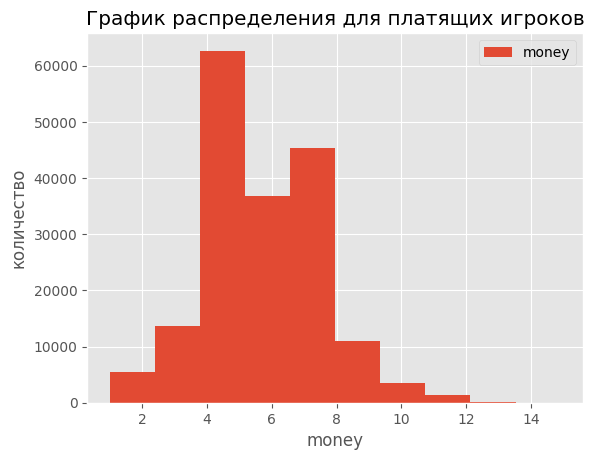

Эксцесс  -0.04901753694799815
Ассиметрия  0.22509134946442036


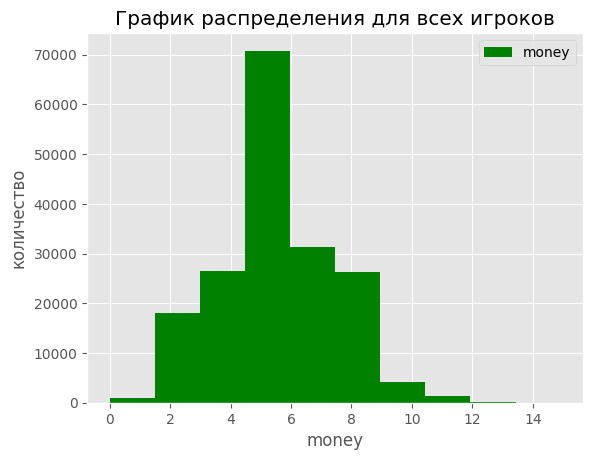

Эксцесс  -0.03658336978708654
Ассиметрия  0.21783101352028067


In [199]:
grafics(control_group_PS4)

In [200]:
intervals(control_group_PS4, 'money', alpha = 0.95)

Доверительный интервал (-0.7988339758663355, 2.2332457103105074)


Интервалы также пересекаются, результаты от акции получены случайно, но метрики ARPU и ARPPU больше для тестовой выборки. Значит акция немного подействовала на игроков на PS4 но хуже, чем на игроков на ПК, так как ARPU ARPPU меньше чем у игроков на ПК

### тестовая группа для игроков на Xbox

In [201]:
metrica(test_group_Xbox)

ARPU 6.1327659279086175
ARPPU 6.133685587336844


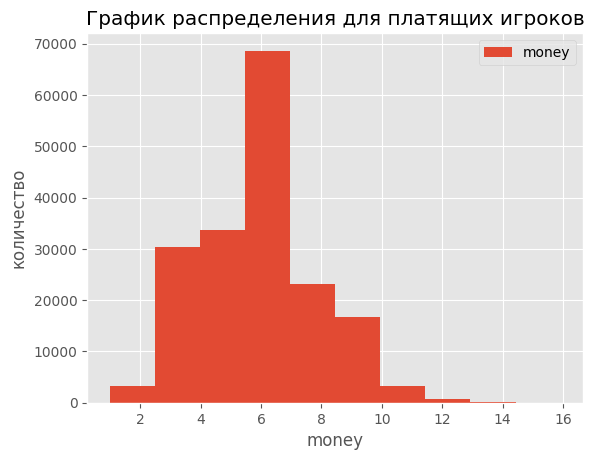

Эксцесс  0.004957897919129817
Ассиметрия  0.24190226379422552


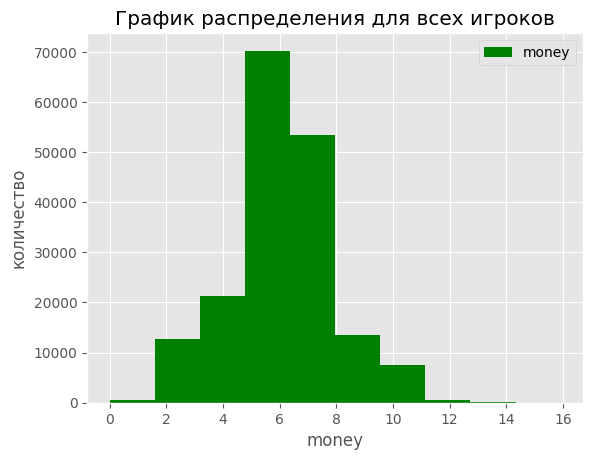

Эксцесс  0.012458503010370325
Ассиметрия  0.23785999509845931


In [202]:
grafics(test_group_Xbox)

In [203]:
intervals(test_group_Xbox, 'money', alpha = 0.95)

Доверительный интервал (-0.8219481625618549, 2.355139644539009)


### контрольная группа для игроков на PS4

In [204]:
metrica(control_group_Xbox)

ARPU 6.103520877781164
ARPPU 6.104434234154337


In [205]:
intervals(control_group_Xbox, 'money', alpha = 0.95)

Доверительный интервал (-0.8113522550475255, 2.3372324744928163)


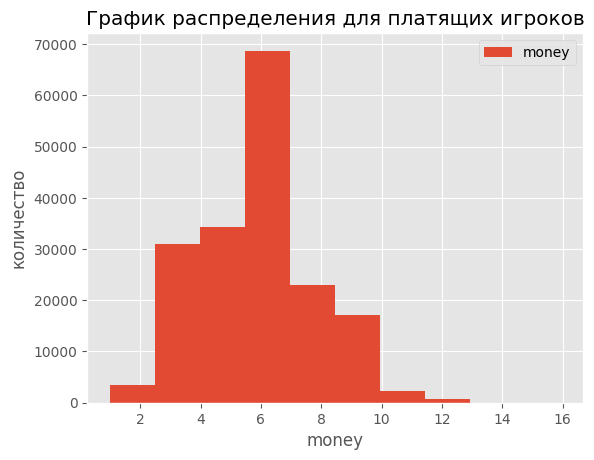

Эксцесс  7.173932957060813e-05
Ассиметрия  0.23727420948058608


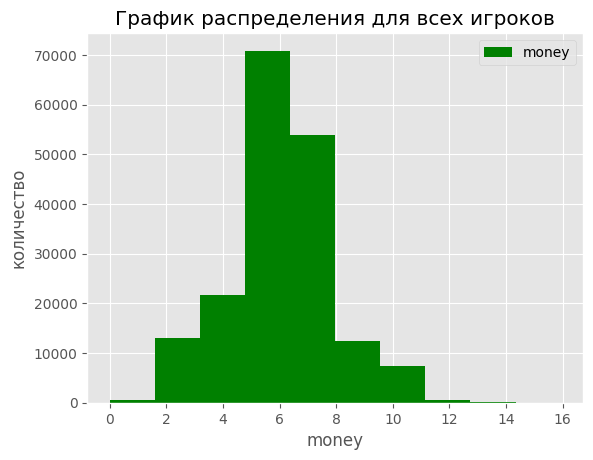

Эксцесс  0.007546259405377231
Ассиметрия  0.23325578640234226


In [206]:
grafics(control_group_Xbox)

На игроков Xbox акция вообще почти не подействовала

### ШАГ 4 Подготовка данных для Power BI и Excel

In [207]:
test_group = players[players['group'] == 'test']
control_group = players[players['group'] == 'control']

In [208]:
test_group_power = test_group.pivot_table(
    index=['date'], values=['cash','money','user_id'], aggfunc={'cash':"sum", 'money':"sum",'user_id':"count"}).reset_index()

In [209]:
test_group

,user_id,group,date,cash,money,cheaters,platform
8,2AXN3D-71ZN86,test,2021-07-13,500,0.0,0,PC
9,2AXN3D-71ZN86,test,2021-07-10,550,0.0,0,PC
10,2AXN3D-71ZN86,test,2021-07-14,1700,1.0,0,PC
11,2AXN3D-71ZN86,test,2021-07-15,600,0.0,0,PC
12,2AXN3D-71ZN86,test,2021-07-17,0,0.0,0,PC
...,...,...,...,...,...,...,...
8639963,YO85DZ-Q7ZCCH,test,2021-07-14,1200,2.0,0,PS4
8639964,YO85DZ-Q7ZCCH,test,2021-07-11,1550,1.0,0,PS4
8639965,YO85DZ-Q7ZCCH,test,2021-07-16,150,0.0,0,PS4
8639966,YO85DZ-Q7ZCCH,test,2021-07-17,0,0.0,0,PS4


In [210]:
test_group_pay = test_group[test_group['money'] > 0]

In [211]:
test_group_pay = test_group_pay.pivot_table(
    index=['date'], values=['user_id','cash'], aggfunc={'user_id':"count", 'cash':"sum"}).reset_index()

In [212]:
powerbi_test = test_group_power.merge(test_group_pay, on = 'date')

In [213]:
powerbi_test = powerbi_test.rename(columns={"cash_x": "cash_all_users", "cash_y": "cash_paying_users", "user_id_x": "count_all_users", "user_id_y": "count_paying_users"})

In [214]:
powerbi_test

,date,cash_all_users,money,count_all_users,cash_paying_users,count_paying_users
0,2021-07-10,439980100,"410,341.9",539312,348431750,335806
1,2021-07-11,440212450,"410,937.9",539312,348673550,336006
2,2021-07-12,437566350,"409,077.7",539312,345929850,334928
3,2021-07-13,428022700,"400,947.8",539312,335419800,329120
4,2021-07-14,402593600,"383,022.8",539312,310182100,317418
5,2021-07-15,356375500,"353,538.5",539312,268524300,297646
6,2021-07-16,290573050,"314,611.7",539312,212012050,271526
7,2021-07-17,564372300,"640,910.7",539312,532577750,329332


In [215]:
powerbi_test['ARPU'] = powerbi_test['money'] / powerbi_test['count_all_users']
powerbi_test['ARPPU'] = powerbi_test['money'] / powerbi_test['count_paying_users']

In [216]:
powerbi_test

,date,cash_all_users,money,count_all_users,cash_paying_users,count_paying_users,ARPU,ARPPU
0,2021-07-10,439980100,"410,341.9",539312,348431750,335806,0.8,1.2
1,2021-07-11,440212450,"410,937.9",539312,348673550,336006,0.8,1.2
2,2021-07-12,437566350,"409,077.7",539312,345929850,334928,0.8,1.2
3,2021-07-13,428022700,"400,947.8",539312,335419800,329120,0.7,1.2
4,2021-07-14,402593600,"383,022.8",539312,310182100,317418,0.7,1.2
5,2021-07-15,356375500,"353,538.5",539312,268524300,297646,0.7,1.2
6,2021-07-16,290573050,"314,611.7",539312,212012050,271526,0.6,1.2
7,2021-07-17,564372300,"640,910.7",539312,532577750,329332,1.2,1.9


In [217]:
powerbi_test.to_csv('power_test.csv',index=False)

### повторим то же самое для контрольной группы

In [218]:
control_group_power = control_group.pivot_table(
    index=['date'], values=['cash','money','user_id'], aggfunc={'cash':"sum", 'money':"sum",'user_id':"count"}).reset_index()

In [219]:
control_group_pay = control_group[control_group['money'] > 0]

In [220]:
control_group_pay = control_group_pay.pivot_table(
    index=['date'], values=['user_id','cash'], aggfunc={'user_id':"count", 'cash':"sum"}).reset_index()

In [221]:
powerbi_control = control_group_power.merge(control_group_pay, on = 'date')

In [222]:
powerbi_control = powerbi_control.rename(columns={"cash_x": "cash_all_users", "cash_y": "cash_paying_users", "user_id_x": "count_all_users", "user_id_y": "count_paying_users"})

In [223]:
powerbi_control['ARPU'] = powerbi_control['money'] / powerbi_control['count_all_users']
powerbi_control['ARPPU'] = powerbi_control['money'] / powerbi_control['count_paying_users']

In [224]:
powerbi_control.to_csv('power_control.csv',index=False)

In [234]:
excel = players.pivot_table(
    index=['platform','group'], values=['money','user_id'], aggfunc={'money':"sum",'user_id':"nunique"}).reset_index()

In [235]:
excel['ARPU'] = excel['money'] / excel['user_id']
excel = excel.rename(columns={"user_id": "users"})

In [236]:
excel.to_excel('table.xlsx')

In [237]:
excel

,platform,group,money,users,ARPU
0,PC,control,"1,014,803.1",179732,5.6
1,PC,test,"1,127,299.9",179820,6.3
2,PS4,control,"1,031,651.9",179804,5.7
3,PS4,test,"1,091,719.2",179415,6.1
4,XBox,control,"1,101,410.9",180455,6.1
5,XBox,test,"1,104,370.1",180077,6.1
